In [5]:
import pandas as pd
import numpy as np
fev_df=pd.read_csv("fev_data.csv")
print(fev_df.head())

                      Car full name  Make                        Model  \
0            Audi e-tron 55 quattro  Audi            e-tron 55 quattro   
1            Audi e-tron 50 quattro  Audi            e-tron 50 quattro   
2             Audi e-tron S quattro  Audi             e-tron S quattro   
3  Audi e-tron Sportback 50 quattro  Audi  e-tron Sportback 50 quattro   
4  Audi e-tron Sportback 55 quattro  Audi  e-tron Sportback 55 quattro   

   Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
0                       345700                360                  664   
1                       308400                313                  540   
2                       414900                503                  973   
3                       319700                313                  540   
4                       357000                360                  664   

        Type of brakes Drive type  Battery capacity [kWh]  Range (WLTP) [km]  \
0  disc (front + rear)        

In [ ]:
## Import the dataset as a CSV file and display the first 5 rows for each of the 25 columns.

In [26]:
## Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range
## of 400 km.
## a) Your task is to filter out EVs that meet these criteria.

filtered_data = fev_df[
    (fev_df["Minimal price (gross) [PLN]"] <= 350000)&
    (fev_df["Range (WLTP) [km]"] >= 400)]
print(filtered_data[["Car full name", "Minimal price (gross) [PLN]", "Range (WLTP) [km]"]])

                        Car full name  Minimal price (gross) [PLN]  \
0              Audi e-tron 55 quattro                       345700   
8                             BMW iX3                       282900   
15        Hyundai Kona electric 64kWh                       178400   
18                   Kia e-Niro 64kWh                       167990   
20                   Kia e-Soul 64kWh                       160990   
22                  Mercedes-Benz EQC                       334700   
39  Tesla Model 3 Standard Range Plus                       195490   
40           Tesla Model 3 Long Range                       235490   
41          Tesla Model 3 Performance                       260490   
47    Volkswagen ID.3 Pro Performance                       155890   
48              Volkswagen ID.3 Pro S                       179990   
49                Volkswagen ID.4 1st                       202390   

    Range (WLTP) [km]  
0                 438  
8                 460  
15               

In [17]:
##  b) Group them by the manufacturer (Make).

filtered_data = fev_df[
    (fev_df["Minimal price (gross) [PLN]"] <= 350000)&
    (fev_df["Range (WLTP) [km]"] >= 400)]
make_group = filtered_data.groupby("Make")
for make, group in make_group:
    print(f"\nManufacturer: {make}")
    print(group[["Car full name", "Minimal price (gross) [PLN]", "Range (WLTP) [km]"]])


Manufacturer: Audi
            Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]
0  Audi e-tron 55 quattro                       345700                438

Manufacturer: BMW
  Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]
8       BMW iX3                       282900                460

Manufacturer: Hyundai
                  Car full name  Minimal price (gross) [PLN]  \
15  Hyundai Kona electric 64kWh                       178400   

    Range (WLTP) [km]  
15                449  

Manufacturer: Kia
       Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]
18  Kia e-Niro 64kWh                       167990                455
20  Kia e-Soul 64kWh                       160990                452

Manufacturer: Mercedes-Benz
        Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]
22  Mercedes-Benz EQC                       334700                414

Manufacturer: Tesla
                        Car full name  Minimal price (gross) [PLN]  \

In [7]:
##  c) Calculate the average battery capacity for each manufacturer.

filtered_data = fev_df[
    (fev_df["Minimal price (gross) [PLN]"] <= 350000)&
    (fev_df["Range (WLTP) [km]"] >= 400)]
average_battery_capacity = filtered_data.groupby("Make")["Battery capacity [kWh]"].mean()
print(average_battery_capacity)

Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64


In [ ]:
## In the above task, I applied basic comparison operators to find EVs whose price is less than 350,000 and range is greater than 400.
## By doing this, I found 12 cars that met the criteria. Then, I used the group by function to group the cars by their manufacturers.
## Finally, I calculated the average battery capacity for each manufacturer using the mean function.


In [9]:
## Task 2: You suspect some EVs have unusually high or low energy consumption. Find the
## outliers in the mean- Energy consumption [kWh/100 km] column.

# Calculate the Q1, Q3, and IQR for the mean energy consumption
Q1 = fev_df["mean - Energy consumption [kWh/100 km]"].quantile(0.25)
Q3 = fev_df["mean - Energy consumption [kWh/100 km]"].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR    # Define lower and upper bounds for outliers
ub = Q3 + 1.5 * IQR
# Find outliers
outliers = fev_df[
    (fev_df["mean - Energy consumption [kWh/100 km]"] < lb)| 
    (fev_df["mean - Energy consumption [kWh/100 km]"] > ub)
]
print(outliers[["Car full name", "mean - Energy consumption [kWh/100 km]"]]) # Display the outliers


Empty DataFrame
Columns: [Car full name, mean - Energy consumption [kWh/100 km]]
Index: []


In [ ]:
## For the above task, I used the Interquartile Range (IQR) method to find outliers. I applied the formula to calculate the results, 
## but I did not find any outliers in the energy consumption data


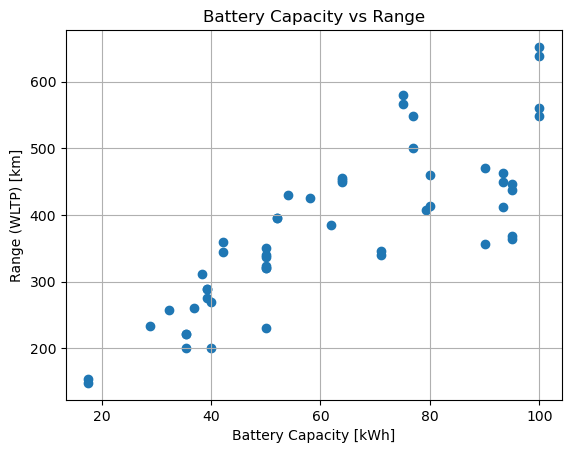

In [48]:
##  Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.
## a) Create a suitable plot to visualize.

import matplotlib.pyplot as plt
plt.scatter( fev_df["Battery capacity [kWh]"],fev_df["Range (WLTP) [km]"])
# Add titles and labels
plt.title("Battery Capacity vs Range")
plt.xlabel("Battery Capacity [kWh]")
plt.ylabel("Range (WLTP) [km]")
plt.grid(True)
plt.show()

In [11]:
##  b) Highlight any insights
from scipy.stats import pearsonr
battery_capacity = fev_df["Battery capacity [kWh]"]
range_wltp = fev_df["Range (WLTP) [km]"]
corr_coef, p_value = pearsonr(battery_capacity, range_wltp)
print(corr_coef, p_value)
## The Pearson correlation coefficient between battery capacity and range is 0.81, which indicates a strong positive relationship. 
## From the p-value, it indicates that the correlation is statistically significant
## Generally, as battery capacity increases, the range also increases. 

0.8104385771936842 1.9463993727927223e-13


In [ ]:
## In the above task, I used Matplotlib to visualize the relationship between battery capacity and range.
## From the plot, I observed that as battery capacity increases, the range also increases.
## The Pearson correlation coefficient between battery capacity and range is 0.81, indicating a strong positive relationship. 
## I also calculated the p-value, which showed that the correlation is statistically significant.

In [25]:
##  Task 4: Build an EV recommendation class. The class should allow users to input their
## budget, desired range, and battery capacity. The class should then return the top three EVs
## matching their criteria.

class EV_data:
    def __init__(self, a):
        self.fev_df = pd.read_csv(a)

    def your_input(self):
        self.budget = int(input("Enter your budget (in PLN): "))
        self.min_range = int(input("Enter your desired minimum range (in km): "))
        self.min_battery_capacity = float(input("Enter your desired minimum battery capacity (in kWh): "))

    def recommend(self):
        # Filter based on user input
        filtered = self.fev_df[
            (self.fev_df["Minimal price (gross) [PLN]"] <= self.budget) &
            (self.fev_df["Range (WLTP) [km]"] >= self.min_range) &
            (self.fev_df["Battery capacity [kWh]"] >= self.min_battery_capacity)
        ]

        # Sort by price ascending (cheapest first)
        recommended_to_user= filtered.sort_values(by="Minimal price (gross) [PLN]").head(3)

        if recommended_to_user.empty:
            print("\nSorry, no EVs match your criteria.")
        else:
            print("\nTop 3 EVs matching your preferences:")
            print(recommended_to_user[['Car full name', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']])

    def run(self):
        self.your_input()
        self.recommend()

# Usage
recommender = EV_data('fev_data.csv')
recommender.run()


Enter your budget (in PLN):  345000
Enter your desired minimum range (in km):  440
Enter your desired minimum battery capacity (in kWh):  75



Top 3 EVs matching your preferences:
               Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
48     Volkswagen ID.3 Pro S                       179990                549   
49       Volkswagen ID.4 1st                       202390                500   
40  Tesla Model 3 Long Range                       235490                580   

    Battery capacity [kWh]  
48                    77.0  
49                    77.0  
40                    75.0  


In [ ]:
## In the above task, I built a class called EV_data. Using this, buyers can set their own criteria for purchasing a suitable car based on their needs.
## They can select a budget, desired range, and battery capacity to find which cars are available within their criteria. 
## This will save buyers time in finding a suitable car. Once they select the budget, range, and battery capacity, 
## the program will automatically recommend the three best cars that meet their criteria.

In [15]:
## Task 5: Inferential Statistics– Hypothesis Testing: Test whether there is a significant
## difference in the average Engine power [KM] of vehicles manufactured by two leading
## manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?
## Recommendations and Conclusion: Provide actionable insights based on your analysis.
## (Conduct a two sample t-test using ttest_ind from scipy.stats module)

from scipy.stats import ttest_ind
tesla_car = fev_df[fev_df["Make"] == "Tesla"]["Engine power [KM]"]
audi_car = fev_df[fev_df["Make"] == "Audi"]["Engine power [KM]"]
t_statistic, p_value = ttest_ind(tesla_car, audi_car, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.5f}")

T-statistic: 1.794
P-value: 0.10684


In [ ]:
''' A two-sample independent t-test was conducted to compare the average Engine Power (measured in KM) between Tesla and Audi vehicles.
We know that if the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in average engine power between Tesla and Audi vehicles. otherwise, if the p-value is greater than 0.05, we fail to reject the null hypothesis, implying that no significant difference exists in the average engine power between the two brands.
Conclusion:
In our case, we got p-value of 0.10684 which is greater than 0.05, so we fail to reject the null hypothesis, implying that no significant difference exists in the average engine power between the two brands.
Recommendations:
Buyers can base their decision more on other factors such as price, driving range, battery life, and design features rather than solely on engine power.
Both companies need to focus on other factors very carefully.
Actionable Insights:
Integrate customer preference surveys to align EV offerings with market demands more precisely.'''
